# Muestra de Imagenes

Total .npy: 199
shape: (2680, 3370, 5) dtype: uint8 path: DJI_0047_R.npy


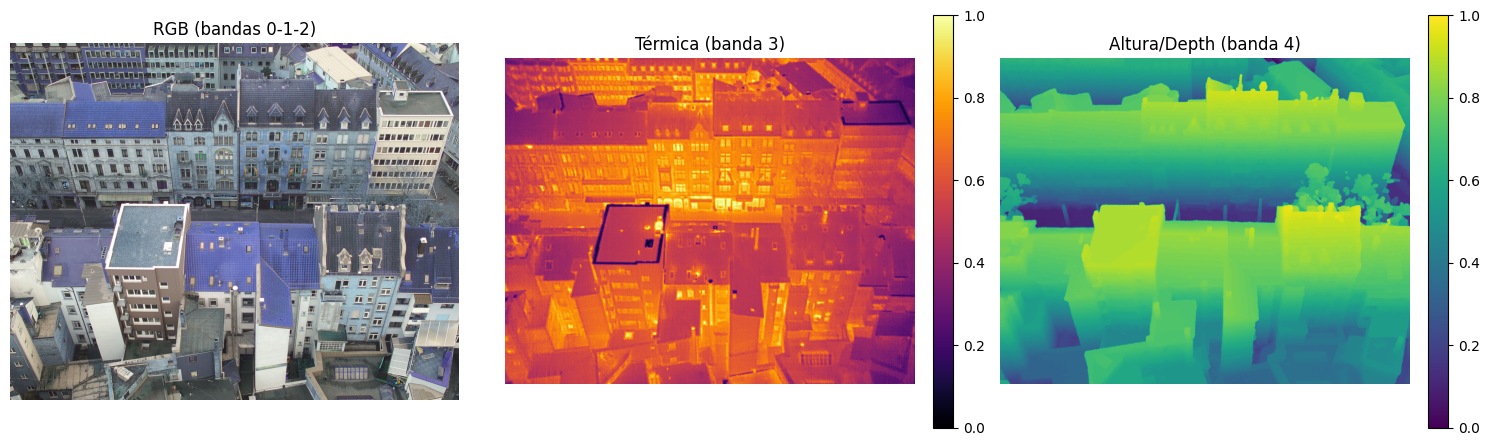

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os

def norm01(x):
    x = x.astype(np.float32)
    return (x - x.min()) / (x.max() - x.min() + 1e-9)

# Cambiá a 104 si querés
folder = "/home/ignacio/TBBR/Flug1_100/train/images/Flug1_100"
paths = sorted(glob.glob(os.path.join(folder, "*.npy")))
print("Total .npy:", len(paths))
p = paths[0]
arr = np.load(p)
print("shape:", arr.shape, "dtype:", arr.dtype, "path:", os.path.basename(p))

# ---- RGB (bandas 0,1,2) ----
rgb = arr[..., :3]                         # (H,W,3)
# Si no está en 0..255 uint8, normalizamos por canal y pasamos a uint8
if rgb.dtype != np.uint8 or rgb.max() > 255 or rgb.min() < 0:
    rgb_uint8 = (norm01(rgb) * 255).clip(0,255).astype(np.uint8)
else:
    rgb_uint8 = rgb

# ---- Térmica (banda 3) ----
thermal = arr[..., 3]
thermal_viz = norm01(thermal)

# ---- Altura/Depth (banda 4) ----
height = arr[..., 4]
height_viz = norm01(height)

# ---- Mostrar todo junto ----
plt.figure(figsize=(15,4.5))

plt.subplot(1,3,1)
plt.imshow(rgb_uint8)
plt.title("RGB (bandas 0-1-2)")
plt.axis("off")

plt.subplot(1,3,2)
im = plt.imshow(thermal_viz, cmap="inferno")
plt.title("Térmica (banda 3)")
plt.axis("off")
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.subplot(1,3,3)
im2 = plt.imshow(height_viz, cmap="viridis")
plt.title("Altura/Depth (banda 4)")
plt.axis("off")
plt.colorbar(im2, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()
